In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Embedding, LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.datasets import imdb

NB_EPOCH = 5
BATCH_SIZE = 64
VERBOSE = 1

# число слов с помощью которого кодируем отзывы
len_dictinary = 6000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=5000)

# устанавливаем максимальную длину последовательности
maxlen = 100
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

#RNN model
model = Sequential()
# векторное погружение слов - длина 32
model.add(Embedding(len_dictinary, 32, dropout=0.2))
# слойй долгой0краткосрочной памяти
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# орпеделеяем метод оптимизации и функцию потерь.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
# обучение модели
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_data=(X_test, Y_test))

scores = model.evaluate(X_test, Y_test)
print("Test accuracy = {}".format(scores[1] * 100))


Using TensorFlow backend.
d:\учёба\магистратура\____аспирантура\___keras\venv\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          192000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 245,301
Trainable params: 245,301
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 45s 2ms/step - loss: 0.4925 - acc: 0.7635 - val_loss: 0.3750 - val_acc: 0.8374
Epoch 2/5
25000/25000 [==============================] - 43s 2ms/step - loss: 0.3654 - acc: 0.8458 - val_loss: 0.3643 - val_acc: 0.8419
Epoch 3/5
25000/25000 [==============================] - 45s 2ms/step - loss: 

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

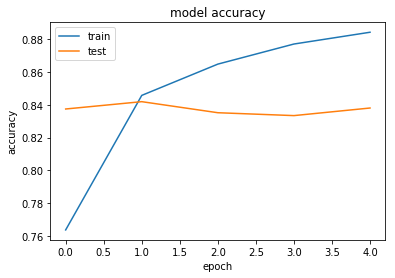

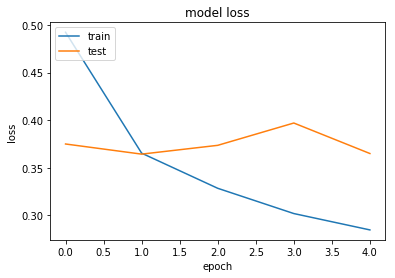

In [2]:
# построить график изменения верности
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# построить график изменения gjnthb
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()